<h2>DL Group 10</h2>


<table>
  <tr>
    <th>Student Name</th>
    <th>BITS ID</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>ADITYA NANDAN REDDY SANIVARAPU</td>
    <td>2022dc04019</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>SANJANA SANJEEV DESHPANDE</td>
    <td>2022dc04091</td>
    <td>100%</td>
  </tr>
  <tr>
    <td>DINESH KUMAR NAYAK</td>
    <td>2022da04293</td>
    <td>100%</td>
  </tr>
</table>

# Learning Work Embeddings

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.set_random_seed(42)

## Dataset - IMDB

In [3]:
imdb = keras.datasets.imdb

max_features = 20000

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)


# Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz
# 17465344/17464789 [==============================] - 8s 0us/step


print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen =25)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen =25)

print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

25000 25000
25000 25000
25000 25000
25000 25000


## LSTM

In [4]:
lstmModel = keras.models.Sequential()

lstmModel.add(keras.layers.Embedding(input_dim = max_features, output_dim = 128))

lstmModel.add(keras.layers.LSTM(128, dropout=0.2)) #, recurrent_dropout=0.2

lstmModel.add(keras.layers.Dense(1, activation = 'sigmoid'))

lstmModel.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# train the model

history = lstmModel.fit(Xtrain, Ytrain, epochs = 15, batch_size=16, validation_split=0.2, verbose=1 )

Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 112s 6ms/sample - loss: 0.5103 - acc: 0.7393 - val_loss: 0.4768 - val_acc: 0.7608
Epoch 2/15
20000/20000 [==============================] - 110s 6ms/sample - loss: 0.3454 - acc: 0.8489 - val_loss: 0.5016 - val_acc: 0.7602
Epoch 3/15
20000/20000 [==============================] - 120s 6ms/sample - loss: 0.2330 - acc: 0.9035 - val_loss: 0.5999 - val_acc: 0.7616
Epoch 4/15
20000/20000 [==============================] - 133s 7ms/sample - loss: 0.1496 - acc: 0.9417 - val_loss: 0.7581 - val_acc: 0.7544
Epoch 5/15
20000/20000 [==============================] - 142s 7ms/sample - loss: 0.0917 - acc: 0.9649 - val_loss: 0.8958 - val_acc: 0.7588
Epoch 6/15
20000/20000 [==============================] - 150s 7ms/sample - loss: 0.0599 - acc: 0.9791 - val_loss: 1.1558 - val_acc: 0.7448
Epoch 7/15
20000/20000 [==============================] - 167s 8ms/sample - loss: 0.0394 - acc: 0.9869 - val_lo

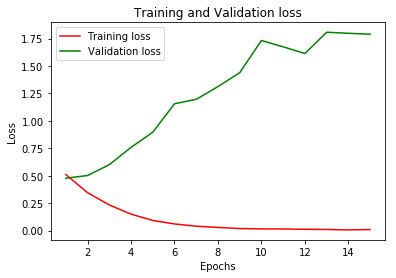

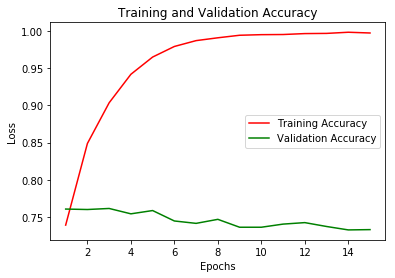

In [7]:
# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(testLoss, testAccuracy)

25000/25000 [==============================] - 18s 704us/sample - loss: 1.7381 - acc: 0.7378
1.7381113950538636 0.73784


# Exercise 

Modify the code as per the below instructions
- Use a different dataset.
- Choose a different embedding like word2vec or gensim, if applicable. 
- Modify the architecture, as below
    - Single layer of LSTM and FC
    - Two layers of LSTM and FC
- Change the number of LSTM units in each layer.



### Dataset - Twitter Reviews
     - Link to download : https://github.com/crwong/cs224u-project/blob/master/data/sentiment/training.1600000.processed.noemoticon.csv

In [44]:
import nltk
from nltk.corpus import stopwords
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import gensim
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
import warnings

def suppress_warnings():
    """
    Suppress DeprecationWarning,UserWarning.
    """
    warnings.filterwarnings("ignore", category=DeprecationWarning) # Suppress Deprecati
    warnings.filterwarnings("ignore", category=UserWarning) # Suppress UserWarni
    warnings.filterwarnings("ignore", category=FutureWarning)
    # Suppress UserWarning for outdated numexpr and bottleneck versions
    warnings.filterwarnings('ignore', message="Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).", category=UserWarning)
    warnings.filterwarnings('ignore', message="Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).", category=UserWarning)

suppress_warnings()

### Preprocessing 

In [45]:
# Load and preprocess data
data = pd.read_csv("../training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)

# create appropriate column names
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# to save time on computation - choosing only limited texts for processing.
df = data.head(20000)

df.columns = columns
df['target'].replace({0: 'Negative', 2: 'Neutral', 4: 'Positive'}, inplace=True)

missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

suppress_warnings()

Missing values per column:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


C:\Users\kanag\AppData\Local\Temp\ipykernel_23012\2483172832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'].replace({0: 'Negative', 2: 'Neutral', 4: 'Positive'}, inplace=True)


In [46]:
def preprocess_text(text):
    text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', text)  # Remove special characters, URLs, and Twitter handles
    words = text.lower().split()  # Convert to lowercase and split into words
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')  # Preserve 'not'
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

df['text_processed'] = df['text'].apply(lambda x: preprocess_text(x))

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text_processed'])
vocab_size = len(tokenizer.word_index) + 1
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['text_processed']), maxlen=300)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['text_processed']), maxlen=300)

# Encoding categorical target
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(train_df['target'])
y_test = labelencoder.fit_transform(test_df['target'])


C:\Users\kanag\AppData\Local\Temp\ipykernel_23012\3985343173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_processed'] = df['text'].apply(lambda x: preprocess_text(x))


### word2Vec embeddeding -  Both models utilize Word2Vec embeddings to convert input text sequences into dense vector representations. 

In [47]:
# Word2Vec Model
documents = [text.split() for text in train_df['text_processed']]
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=300, window=7, min_count=10, workers=8)
w2v_model.build_vocab(documents)
w2v_model.train(documents, total_examples=len(documents), epochs=30)

# Embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

### Single layer of LSTM and FC

In [48]:
# Build LSTM model - Single layer of LSTM and FC
lstm_single_layer_model = Sequential()
lstm_single_layer_model.add(embedding_layer)
lstm_single_layer_model.add(LSTM(256, dropout=0.2))
lstm_single_layer_model.add(Dense(1, activation='sigmoid'))
lstm_single_layer_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

lstm_single_layer_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 300)          5495100   
                                                                 
 lstm_5 (LSTM)               (None, 256)               570368    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 6065725 (23.14 MB)
Trainable params: 570625 (2.18 MB)
Non-trainable params: 5495100 (20.96 MB)
_________________________________________________________________


Epoch 1/15
15/15 [==============================] - 114s 8s/step - loss: 0.6110 - accuracy: 0.6701 - val_loss: 0.5825 - val_accuracy: 0.6931
Epoch 2/15
15/15 [==============================] - 155s 10s/step - loss: 0.5768 - accuracy: 0.6987 - val_loss: 0.5603 - val_accuracy: 0.7081
Epoch 3/15
15/15 [==============================] - 145s 10s/step - loss: 0.5678 - accuracy: 0.7054 - val_loss: 0.5505 - val_accuracy: 0.7138
Epoch 4/15
15/15 [==============================] - 121s 8s/step - loss: 0.5572 - accuracy: 0.7115 - val_loss: 0.5432 - val_accuracy: 0.7188
Epoch 5/15
15/15 [==============================] - 120s 8s/step - loss: 0.5508 - accuracy: 0.7183 - val_loss: 0.5383 - val_accuracy: 0.7219
Epoch 6/15
15/15 [==============================] - 120s 8s/step - loss: 0.5440 - accuracy: 0.7190 - val_loss: 0.5330 - val_accuracy: 0.7256
Epoch 7/15
15/15 [==============================] - 120s 8s/step - loss: 0.5363 - accuracy: 0.7256 - val_loss: 0.5324 - val_accuracy: 0.7275
Epoch 8/15


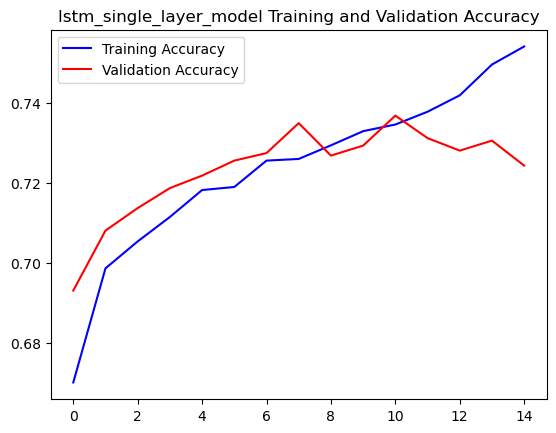

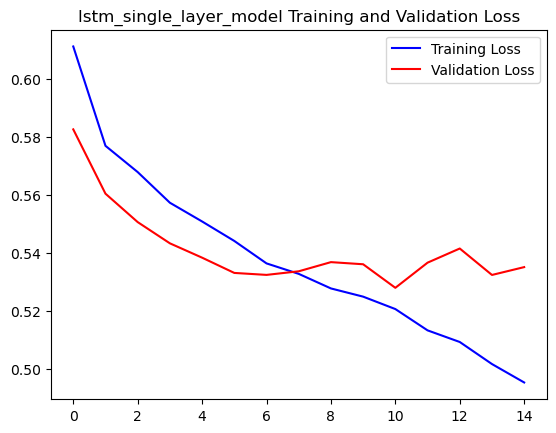

125/125 [==============================] - 24s 195ms/step - loss: 0.5303 - accuracy: 0.7262
lstm_single_layer_model Test Loss: 0.5303068161010742
lstm_single_layer_model Test Accuracy: 0.7262499928474426


In [49]:
# Train the lstm_single_layer_model
model_history = lstm_single_layer_model.fit(X_train, y_train, batch_size=1024, epochs=15, validation_split=0.1, verbose=1)

# Plotting training and validation accuracy
plt.plot(model_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.title("lstm_single_layer_model Training and Validation Accuracy")
plt.show()

# Plotting training and validation loss
plt.plot(model_history.history['loss'], label='Training Loss', color='blue')
plt.plot(model_history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.title("lstm_single_layer_model Training and Validation Loss")
plt.show()

# Evaluate lstm_single_layer_model on test data
test_loss, test_accuracy = lstm_single_layer_model.evaluate(X_test, y_test)
print("lstm_single_layer_model Test Loss:", test_loss)
print("lstm_single_layer_model Test Accuracy:", test_accuracy)

### Two layers of LSTM and FC

In [50]:
lstm_two_layer_model = Sequential()
lstm_two_layer_model.add(embedding_layer)
lstm_two_layer_model.add(LSTM(100, dropout=0.2, return_sequences=True))  # Add return_sequences=True
lstm_two_layer_model.add(LSTM(100, dropout=0.2))  # Second LSTM layer
lstm_two_layer_model.add(Dense(1, activation='sigmoid'))
lstm_two_layer_model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

lstm_two_layer_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 300)          5495100   
                                                                 
 lstm_6 (LSTM)               (None, 300, 100)          160400    
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5736001 (21.88 MB)
Trainable params: 240901 (941.02 KB)
Non-trainable params: 5495100 (20.96 MB)
_________________________________________________________________


Epoch 1/15
15/15 [==============================] - 82s 5s/step - loss: 0.6358 - accuracy: 0.6555 - val_loss: 0.5928 - val_accuracy: 0.6906
Epoch 2/15
15/15 [==============================] - 82s 6s/step - loss: 0.5895 - accuracy: 0.6946 - val_loss: 0.5671 - val_accuracy: 0.7081
Epoch 3/15
15/15 [==============================] - 82s 6s/step - loss: 0.5749 - accuracy: 0.7002 - val_loss: 0.5555 - val_accuracy: 0.7131
Epoch 4/15
15/15 [==============================] - 83s 6s/step - loss: 0.5662 - accuracy: 0.7049 - val_loss: 0.5534 - val_accuracy: 0.7144
Epoch 5/15
15/15 [==============================] - 83s 6s/step - loss: 0.5588 - accuracy: 0.7128 - val_loss: 0.5438 - val_accuracy: 0.7181
Epoch 6/15
15/15 [==============================] - 83s 6s/step - loss: 0.5492 - accuracy: 0.7173 - val_loss: 0.5388 - val_accuracy: 0.7175
Epoch 7/15
15/15 [==============================] - 86s 6s/step - loss: 0.5467 - accuracy: 0.7183 - val_loss: 0.5392 - val_accuracy: 0.7244
Epoch 8/15
15/15 [==

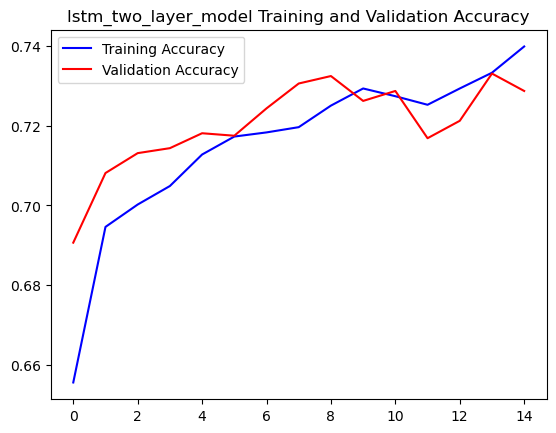

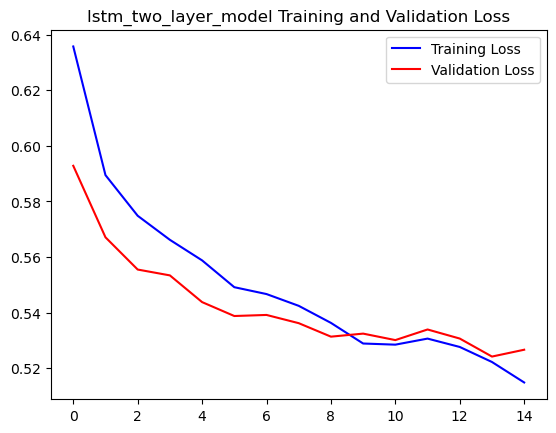

125/125 [==============================] - 17s 133ms/step - loss: 0.5247 - accuracy: 0.7312
lstm_two_layer_model Test Loss: 0.5246685743331909
lstm_two_layer_model Test Accuracy: 0.731249988079071


In [51]:
# Train the lstm_two_layer_model
model_history = lstm_two_layer_model.fit(X_train, y_train, batch_size=1024, epochs=15, validation_split=0.1, verbose=1)

# Plotting training and validation accuracy
plt.plot(model_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.title("lstm_two_layer_model Training and Validation Accuracy")
plt.show()

# Plotting training and validation loss
plt.plot(model_history.history['loss'], label='Training Loss', color='blue')
plt.plot(model_history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.title("lstm_two_layer_model Training and Validation Loss")
plt.show()

# Evaluate lstm_two_layer_model on test data
test_loss, test_accuracy = lstm_two_layer_model.evaluate(X_test, y_test)
print("lstm_two_layer_model Test Loss:", test_loss)
print("lstm_two_layer_model Test Accuracy:", test_accuracy)

### Summary : Both models performs reasonably well on the test dataset, indicating that it effectively learns the patterns in the input sequences.